
# Learning Pandas, Seaborn, and SciPy Stats

In this notebook, we will explore:
1. **Pandas** basics: sorting, selection, and masking
2. **Seaborn** for visualization with regression fits
3. **SciPy Stats** for basic statistical analysis


In [1]:

import pandas as pd
import numpy as np

# Create a simple DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, 30, 35, 40, 29],
    'Score': [88, 92, 85, 70, 95]
}

df = pd.DataFrame(data)
print("DataFrame:")
print(df)

# Selection
print("\nSelect 'Name' column:")
print(df['Name'])

# Masking
print("\nSelect rows where Score > 85:")
print(df[df['Score'] > 85])

# Sorting
print("\nSort by Age:")
print(df.sort_values('Age'))


DataFrame:
      Name  Age  Score
0    Alice   25     88
1      Bob   30     92
2  Charlie   35     85
3    David   40     70
4      Eve   29     95

Select 'Name' column:
0      Alice
1        Bob
2    Charlie
3      David
4        Eve
Name: Name, dtype: object

Select rows where Score > 85:
    Name  Age  Score
0  Alice   25     88
1    Bob   30     92
4    Eve   29     95

Sort by Age:
      Name  Age  Score
0    Alice   25     88
4      Eve   29     95
1      Bob   30     92
2  Charlie   35     85
3    David   40     70


In [2]:

# Add new column
df['Passed'] = df['Score'] > 75

# Group by Passed
grouped = df.groupby('Passed')['Score'].mean()
print("Average score by pass/fail:")
print(grouped)

# Describe statistics
print("\nDescriptive statistics:")
print(df.describe())


Average score by pass/fail:
Passed
False    70.0
True     90.0
Name: Score, dtype: float64

Descriptive statistics:
            Age      Score
count   5.00000   5.000000
mean   31.80000  86.000000
std     5.80517   9.721111
min    25.00000  70.000000
25%    29.00000  85.000000
50%    30.00000  88.000000
75%    35.00000  92.000000
max    40.00000  95.000000


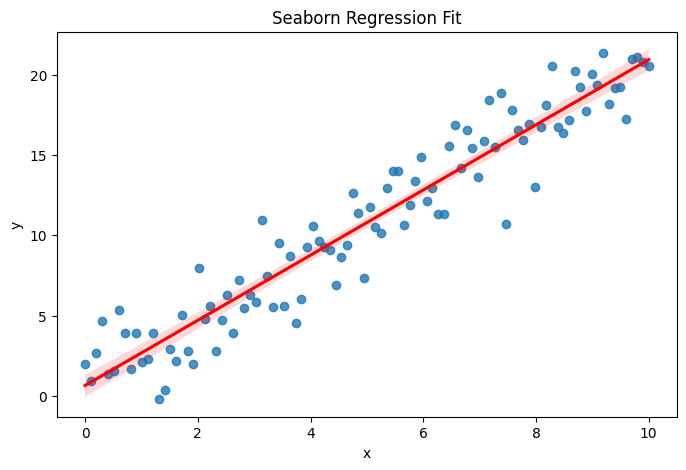

In [3]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create synthetic data for regression
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 2*x + 1 + np.random.normal(scale=2, size=100)
df_reg = pd.DataFrame({'x': x, 'y': y})

plt.figure(figsize=(8,5))
sns.regplot(data=df_reg, x='x', y='y', ci=95, line_kws={'color':'red'})
plt.title("Seaborn Regression Fit")
plt.show()


In [4]:

from scipy import stats

# Perform correlation test
corr, pval = stats.pearsonr(df_reg['x'], df_reg['y'])
print(f"Pearson correlation: {corr:.3f}, p-value: {pval:.3e}")

# One-sample t-test: is mean(y) significantly different from 0?
tstat, pval = stats.ttest_1samp(df_reg['y'], 0)
print(f"One-sample t-test: t-statistic = {tstat:.3f}, p-value = {pval:.3e}")


Pearson correlation: 0.956, p-value: 3.485e-54
One-sample t-test: t-statistic = 17.372, p-value = 8.014e-32
